In [6]:
import numpy as np, os
from matplotlib import pyplot as plt

In [7]:
def read_grid_data(filename):
    """
    Reads a grid data file and converts it to a dictionary with field data vectors.
    
    Args:
        filename (str): Path to the input TXT file.

    Returns:
        dict: Dictionary containing grid dimensions and field data.
              Format: {"Nx": int, "Ny": int, "field_1": [float, ...], "field_2": [float, ...], ...}
    """
    data_dict = {}

    with open(filename, "r") as file:
        # Read the first line: Nx, Ny, N_fields
        first_line = file.readline().strip().split()
        Nx, Ny, N_fields = map(int, first_line)
        
        # Read the second line: field names
        field_names = file.readline().strip().split()
        
        # Check if the number of fields matches
        if len(field_names) != N_fields:
            raise ValueError("Number of field names does not match N_fields")
        
        # Initialize field data vectors
        field_data = {field: np.array([0.0] * (Nx * Ny)) for field in field_names}
        
        # Read the remaining lines: ix, iy, val1, val2, ...
        for line in file:
            parts = line.strip().split()
            ix, iy = map(int, parts[:2])  # Extract grid indices
            values = list(map(float, parts[2:]))  # Extract field values
            
            # Linear index computation
            i = ix + iy * Nx
            
            # Assign values to corresponding field data vectors
            for field_idx, field_name in enumerate(field_names):
                field_data[field_name][i] = values[field_idx]
    
    # Add grid dimensions and field data to the final dictionary
    data_dict["Nx"] = Nx
    data_dict["Ny"] = Ny
    data_dict.update(field_data)
    
    return data_dict

In [8]:
files = os.listdir('Data/Out')

data = [ ]

for f in files:
    data.append(read_grid_data(f'Data/Out/{f}'))

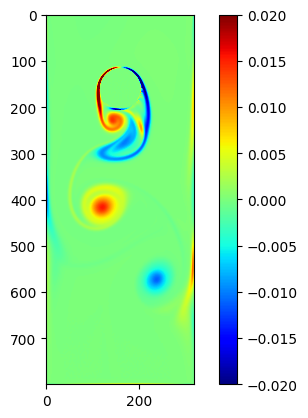

In [9]:
nx,ny = data[0]['Nx'], data[0]['Ny']
frame = -1
vx = data[frame]['vel_x'].reshape(ny,nx).T
vy = data[frame]['vel_y'].reshape(ny,nx).T

curl = np.gradient(vy, axis = 0) - np.gradient(vx, axis = 1)

plt.imshow(curl, cmap = 'jet', vmin = -0.02, vmax = 0.02)
plt.colorbar()
plt.show()

In [10]:
data[0]['Ny']

320